# Dataset Generators

This code generates 3 different kinds of datasets (`INDEP`, `CORR` and `ANTI`) given a dimensionality ($\geq 2$) and cardinality ($\geq 1$)

In [398]:
import numpy as np
from scipy.linalg import null_space
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set_theme(style="white")

In [399]:
DATA_PATH = "./data/"
dimensionality = 3
cardinality = 100
dataset = np.zeros((cardinality, dimensionality))
skyline_indices = []
non_skyline_indices = []
skyline_status = []
A = np.ones((1, dimensionality))
null_A = np.zeros((dimensionality, dimensionality - 1))
for i in range(dimensionality - 1):
    null_A[0,i] = -1
    null_A[i+1,i] = 1

In [446]:
def dominates(idx1, idx2):
    point1 = dataset[idx1,:]
    point2 = dataset[idx2,:]
    one_dom_two = False
    two_dom_one = False
    for i in range(dimensionality):
        if(point1[i] < point2[i]):
            one_dom_two = True
        if(point2[i] < point1[i]):
            two_dom_one = True
    if(one_dom_two and not two_dom_one):
        return True
    return False

def skyline():
    skyline_indices.clear()
    non_skyline_indices.clear()
    for i in range(cardinality):
        dominated = False
        j = 0
        while(j < len(skyline_indices)):
            if(dominates(i,skyline_indices[j])):
                del skyline_indices[j]
            elif(dominates(skyline_indices[j],i)):
                dominated = True
                break
            else:
                j = j + 1
        if(not dominated):
            skyline_indices.append(i)
        else:
            non_skyline_indices.append(i)
            
def valid(idx):
    point = dataset[idx,:]
    if(np.any((point < 0)|(point > 1 ))):
        return False
    return True

def data_frame():
    data = {}
    for i in range(dimensionality):
        data["D_" + str(i+1)] = list(dataset[:,i])
    skyline_status = ["non_skyline" for x in range(cardinality)]
    for i in skyline_indices:
        skyline_status[i] = "skyline"
    data["skyline_status"] = skyline_status
    df = pd.DataFrame(data=data)
    return df

def save_plots():
    skyline()
    df = data_frame()
    sns.heatmap(df.loc[:, df.columns != 'skyline_status'].corr())
    plt.savefig('heatmap.eps')
    sns.pairplot(df, hue="skyline_status", palette="dark")
    plt.savefig('scatterplot_matrix.eps')

## Independent Dataset

In [437]:
def independent_dataset_generator():
    for i in range(cardinality):
        for j in range(dimensionality):
            dataset[i,j] = np.random.uniform(0,1)    

## Correlated Dataset

In [438]:
def correlated_dataset_generator():
    i = 0
    while(i < cardinality):
        plane_point = -1
        while(plane_point < 0 or plane_point > 1):
            plane_point = np.random.normal(0.5, 0.3)
        min_deviation = 0
        if plane_point <= 0.5:
            min_deviation = (plane_point)
        else:
            min_deviation = (1 - plane_point) 
        dataset[i,:] = np.random.normal(plane_point, 0.125, (1, dimensionality))
#         dataset[i,:] = (plane_point * np.ones((dimensionality, 1)) + np.dot(null_A, np.random.normal(plane_point, 0.1, (dimensionality-1, 1)))).T
        if valid(i):
            i = i + 1

## Anti-correlated Dataset

In [439]:
def anti_correlated_dataset_generator():
    i = 0
    while(i < cardinality):
        plane_point = -1
        while(plane_point < 0 or plane_point > 1):
            plane_point = np.random.normal(0.5, 0.1)
        dataset[i,:] = (plane_point * np.ones((dimensionality, 1)) + np.dot(null_A, np.random.uniform(0, 1, (dimensionality-1, 1)))).T
        i = i + 1

In [440]:
independent_dataset_generator()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

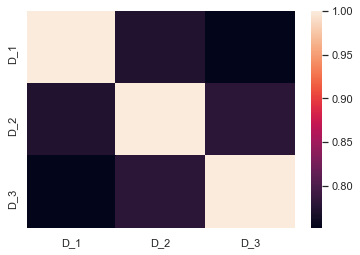

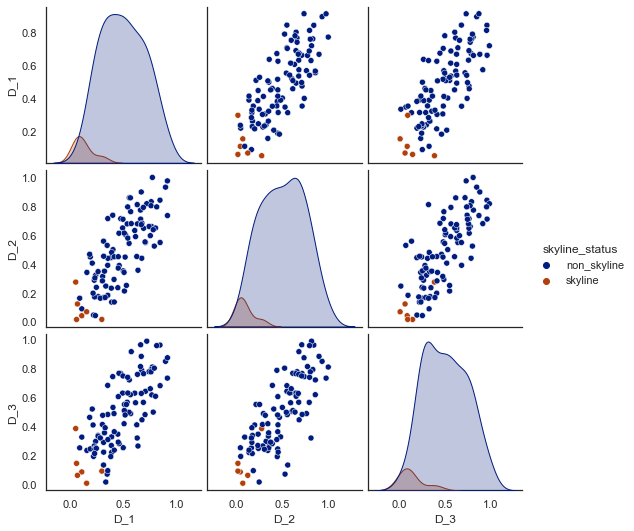

In [447]:
save_plots()

In [442]:
anti_correlated_dataset_generator()

In [444]:
correlated_dataset_generator()